In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import fftpack


"""Generate random dnesity in 2d plane
    with power spectrum P(k) ~ 1/k^3
    
    1. for kx,ky: get |k|
    2. A(k) = |delta(k)| ~ rayleigh(1), phi(k) ~ U(0,2pi)
    3. multiply A(k) by sqrt{Pk} 
    4. FT-1 to get delta(x)
"""

'Generate random dnesity in 2d plane\n    with power spectrum P(k) ~ 1/k^3\n    \n    1. for kx,ky: get |k|\n    2. A(k) = |delta(k)| ~ rayleigh(1), phi(k) ~ U(0,2pi)\n    3. multiply A(k) by sqrt{Pk} \n    4. FT-1 to get delta(x)\n'

In [2]:
nx = 128
ny = 128
L0 = 200.

# generate a rayleigh distributed magnitude and uniform phase

# Pk = kk**(-3.)
kk = np.arange(-nx//2+1,nx//2+1)

# kx and ky: 
kx1d = np.zeros(nx)
kx1d[:nx//2+1] = kk[nx//2-1:]
kx1d[nx//2+1:] = kk[:nx//2-1]
kx1d *= 2*np.pi/ (L0*nx)

# get  agrid of kx and ky:
kxky = np.meshgrid(kx1d,kx1d) #.reshape(1,nx*ny)

kk = np.linalg.norm(kxky,axis=0)


Pk = 1. # kk**(-3.)
# Pk[0,0] = 0



In [3]:

# now generate rayleigh-distributed lengths:
Amp = np.random.rayleigh(1,(nx,ny)) / np.sqrt(2-.5*np.pi)
Amp *= Pk
print (Amp.std())

phase = np.random.rand(nx*ny).reshape((nx,ny)) * 2*np.pi

densktmp = Amp * np.exp(phase*1.0j)


# using fig. A.2 from D. Jeong PhD Thesis to fill dens[k]
densk = np.zeros((nx,ny),dtype='complex')

iNy = nx//2

densk[:iNy+1,:] = densktmp[:iNy+1,:]
densk[0,iNy+1:] = densktmp[0,iNy-1:0:-1].conj()
densk[iNy,iNy+1:] = densktmp[iNy+1,iNy-1:0:-1].conj()


densk[iNy+1:,1:iNy] = densktmp[iNy-1:0:-1,-1:iNy:-1].conj()
densk[iNy+1:,iNy+1:] = densktmp[iNy-1:0:-1,iNy-1:0:-1].conj()
densk[iNy+1:,0] = densktmp[iNy-1:0:-1,0].conj()
densk[iNy+1:,iNy] = densktmp[iNy-1:0:-1,iNy].conj()


0.998453107815331


In [80]:
# Get inverse FFT: 

densr = fftpack.ifft2(densk) 

normdensk = np.abs(densk)
normdensr = np.abs(densr)

# check if normalization is correct:
toto = fftpack.fft2(densr) 
normdenstoto = np.abs(toto)
print (normdensk.std()**2,normdensr.std()**2,normdenstoto.std()**2)

0.9963796518449294 0.00010570928155794378 0.9963796518449292


(128, 128)
0.9412938922026818 1.0628674845733295


array([[2.35619477, 2.04845708, 2.75849823, ..., 2.34154471, 2.75849823,
        2.04845708],
       [2.15473083, 1.63239348, 1.08580989, ..., 2.96473606, 0.63251739,
        3.65764144],
       [0.67960514, 0.71002479, 1.62806671, ..., 0.59672424, 1.38729688,
        1.97806214],
       ...,
       [1.78001678, 0.76137077, 0.27271241, ..., 2.08180311, 2.47507448,
        2.18265861],
       [0.67960514, 1.97806214, 1.38729688, ..., 0.54524739, 1.62806671,
        0.71002479],
       [2.15473083, 3.65764144, 0.63251739, ..., 0.86787204, 1.08580989,
        1.63239348]])

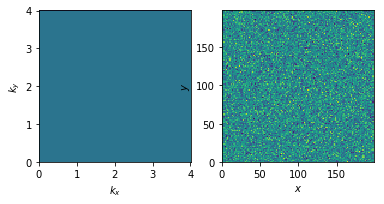

In [107]:
from matplotlib import colors 
fig,ax = plt.subplots(1,2)


kx = kx1d.copy()
kx[:iNy+1] = kx1d[:iNy+1]
kx[iNy+1:] += 2*np.pi/L0 * nx
# print (kk)


# print (1+normdensk)
print (np.shape(normdensk))

iax = ax[0]
# iax.pcolormesh(kx,kx,normdensk.T,norm=colors.LogNorm(vmin=1e-10,vmax=0.02))
iax.pcolormesh(kx,kx,normdensk.T,vmin=0,vmax=normdensk.max()) 
iax.set_aspect(1)
iax.set_ylabel("$k_y$")
iax.set_xlabel("$k_x$")

xx = np.arange(nx)/nx*L0
print ((1+densr.real.min()),(1+densr.real.max()))

iax = ax[1]
# iax.pcolormesh(xx,xx,np.reshape(densr,(nx,ny)))
iax.set_aspect(1)
# iax.pcolormesh(kx,kx,kk) 
iax.pcolormesh(xx,xx,(densr.real).T) #,norm=colors.LogNorm(vmin=.95,vmax=1.05))
iax.set_xlabel("$x$")
iax.set_ylabel("$y$")


normdensk

In [83]:
print (normdensr.std(), normdensk.std())

0.010281501911585864 0.9981881845849155


In [84]:
normdensk.std()

0.9981881845849155

In [69]:
ff = np.random.randn(nx,nx)
print (ff.std())

0.9985919720819398


In [70]:
tf = fftpack.fft2(ff) # / (L0/nx)**2# / (nx/2)


In [71]:
print (np.abs(tf).std())

58.91132159777202


In [72]:
fff = fftpack.ifft2(tf) # * L0**2
print (np.abs(fff).std())

0.6012244902429446


In [73]:
fff.real/ff

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

203.22505414779485